<a href="https://colab.research.google.com/github/hariprasad2422/31-ML-labs/blob/main/ML_Lab15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**15. Write a program to Implement Principle Component Analysis**

**Principal Component Analysis:**
It is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components.

PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

Some common terms used in PCA algorithm

**Dimensionality:** It is the number of features or variables present in the given dataset. More easily, it is the number of columns present in the dataset.

**Correlation:** It signifies that how strongly two variables are related to each other. Such as if one changes, the other variable also gets changed. The correlation value ranges from -1 to +1. Here, -1 occurs if variables are inversely proportional to each other, and +1 indicates that variables are directly proportional to each other.

**Orthogonal:** It defines that variables are not correlated to each other, and hence the correlation between the pair of variables is zero.

**Eigenvectors:** If there is a square matrix M, and a non-zero vector v is given. Then v will be eigenvector if Av is the scalar multiple of v.
Covariance Matrix: A matrix containing the covariance between the pair of variables is called the Covariance Matrix.

**Steps for PCA algorithm**

**1. Getting the dataset**

Firstly, we need to take the input dataset and divide it into two subparts X and Y, where X is the training set, and Y is the validation set.

**2. Representing data into a structure**

Now we will represent our dataset into a structure. Such as we will represent the two-dimensional matrix of independent variable X. Here each row corresponds to the data items, and the column corresponds to the Features. The number of columns is the dimensions of the dataset.

**3. Standardizing the data**

In this step, we will standardize our dataset. Such as in a particular column, the features with high variance are more important compared to the features with lower variance.
If the importance of features is independent of the variance of the feature, then we will divide each data item in a column with the standard deviation of the column. Here we will name the matrix as Z.

**4. Calculating the Covariance of Z**

To calculate the covariance of Z, we will take the matrix Z, and will transpose it. After transpose, we will multiply it by Z. The output matrix will be the Covariance matrix of Z.

**5. Calculating the Eigen Values and Eigen Vectors**

Now we need to calculate the eigenvalues and eigenvectors for the resultant covariance matrix Z. Eigenvectors or the covariance matrix are the directions of the axes with high information. And the coefficients of these eigenvectors are defined as the eigenvalues.

**6. Sorting the Eigen Vectors**

In this step, we will take all the eigenvalues and will sort them in decreasing order, which means from largest to smallest. And simultaneously sort the eigenvectors accordingly in matrix P of eigenvalues. The resultant matrix will be named as P*.

**7. Calculating the new features Or Principal Components**

Here we will calculate the new features. To do this, we will multiply the P* matrix to the Z. In the resultant matrix Z*, each observation is the linear combination of original features. Each column of the Z* matrix is independent of each other.

**8. Remove less or unimportant features from the new dataset.**

The new feature set has occurred, so we will decide here what to keep and what to remove. It means, we will only keep the relevant or important features in the new dataset, and unimportant features will be removed out.

**Dataset Details (Wine Dataset):**
The Wine dataset consists of 178 instances with 13 features.

The features represent the chemical analysis of wines grown in the same region in Italy but derived from three different cultivars (classes).

Features include alcohol content, malic acid, ash, magnesium, flavonoids, and others.

Dataset Overview:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  ta

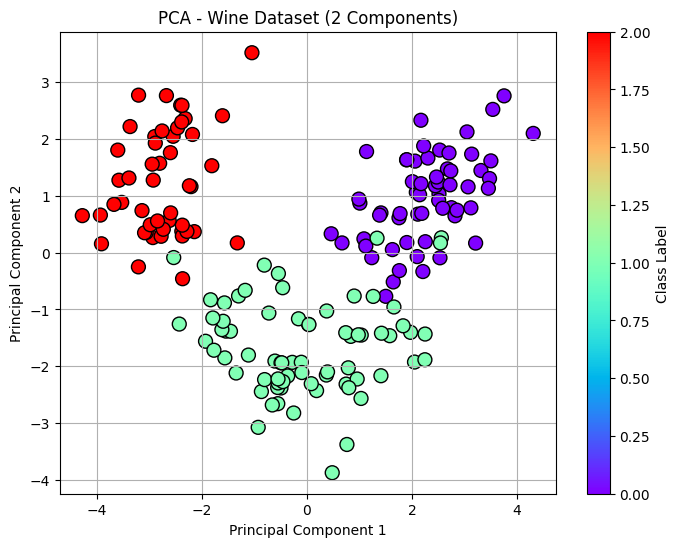

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (cultivars/classes)

# Convert the dataset into a DataFrame for better readability
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = y

print("Dataset Overview:")
print(df.head())

# Standardize the dataset (mean=0, variance=1) - Important step for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA (reduce to 2 components for visualization)
pca = sklearnPCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance to see how much information (variance) is retained
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance (Percentage of Variance Explained by each Component):")
print(explained_variance)

# Plot the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Wine Dataset (2 Components)')
plt.colorbar(scatter, label='Class Label')
plt.grid(True)
plt.show()


**Dataset Details (Digits Dataset):**

The Digits dataset consists of 1,797 samples of handwritten digits, with 10 classes (0–9).

Each sample is represented by 64 features (an 8x8 pixel image).

The goal is to reduce the dimensionality using PCA while retaining most of the variance in the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the Digits dataset
digits = load_digits()
X = digits.data  # Features (64 dimensions)
y = digits.target  # Target (digit labels 0–9)

# Dataset Overview
print("Dataset shape:", X.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance (Percentage of Variance Explained by each Component):")
print(explained_variance)

# Plot the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Digits Dataset (2 Components)')
plt.colorbar(scatter, label='Digit Labels (0–9)')
plt.grid(True)
plt.show()


Dataset shape: (1797, 64)
Number of samples: 1797
Number of features: 64

Explained Variance (Percentage of Variance Explained by each Component):
[0.12033916 0.09561054]
